In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Administrator\anaconda3\lib\site-packages\tensorflow\python\framework\dty

In [2]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 13s 3us/step


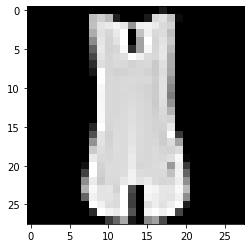

In [6]:
plt.imshow(x_train[4],cmap='gray')

In [4]:
x_train.shape


(60000, 28, 28)

In [7]:
y_train.shape


(60000,)

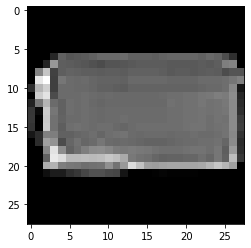

In [8]:
i= random.randint(1,60000)
plt.imshow(x_train[i],cmap='gray')

In [9]:
label=y_train[i]
label

8

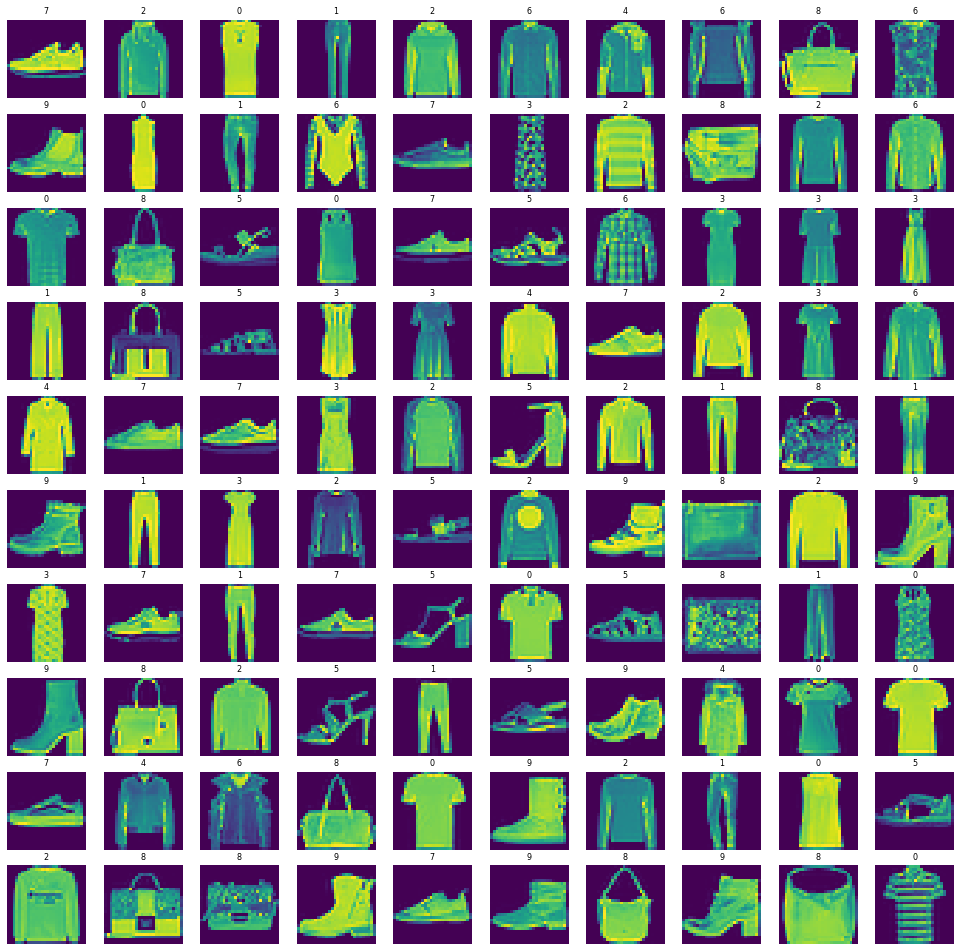

In [12]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid,W_grid,figsize=(17,17))

axes=axes.ravel()

n_training = len(x_train)


for i in np.arange(0,W_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index],fontsize = 8)
    axes[i].axis('off')

In [13]:
x_train = x_train/255
x_test = x_test/255

In [19]:
noise_factor = 0.3

noise_dataset=[]

for img in x_train:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

In [38]:
noise_dataset = np.array(noise_dataset)

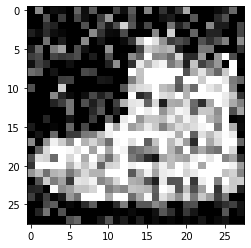

In [20]:
plt.imshow(noise_dataset[0],cmap='gray')

In [21]:
noise_factor = 0.1

noise_test_dataset=[]

for img in x_test:
    noisy_image = img + noise_factor*np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_test_dataset.append(noisy_image)

In [39]:
noise_test_dataset = np.array(noise_test_dataset)

encoder                                        
h(x)=sigmoid(W*x+b)                           
decoder                                        
X' = sigmoid(W*h(x) +c)                        
weights from input to hidden layer will be equal to the weights from hidden layer to output

Auto encoders objective is to minimize the reconstruction error which is the difference between the input x and network output x'

Auto encoders dimensionality reduction is quite similar to PCA if linear activation are used

In [35]:
autoencoder = tf.keras.models.Sequential()

#encoder
autoencoder.add(tf.keras.layers.Conv2D(filters = 16,kernel_size = 3,strides = 2,padding='same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8,kernel_size = 3,strides = 2,padding= 'same'))
autoencoder.add(tf.keras.layers.Conv2D(filters = 8,kernel_size = 3,strides = 1,padding= 'same'))

#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 16,kernel_size = 3,strides = 2,padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1,kernel_size = 3,strides = 2, activation = 'sigmoid',padding='same'))


In [36]:
autoencoder.compile(loss='binary_crossentropy',optimizer = tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [41]:
autoencoder.fit(noise_dataset.reshape(-1,28,28,1),
                x_train.reshape(-1,28,28,1),
                epochs = 10,
                batch_size =200,
                validation_data = (noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))
               )

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 14s 229us/sample - loss: 79.6776 - val_loss: 63.4498
Epoch 2/10
60000/60000 [==============================] - 11s 185us/sample - loss: 63.3032 - val_loss: 60.6940
Epoch 3/10
60000/60000 [==============================] - 11s 184us/sample - loss: 61.7896 - val_loss: 59.4713
Epoch 4/10
60000/60000 [==============================] - 11s 187us/sample - loss: 61.1040 - val_loss: 58.8228
Epoch 5/10
60000/60000 [==============================] - 11s 184us/sample - loss: 60.7877 - val_loss: 58.4964
Epoch 6/10
60000/60000 [==============================] - 11s 188us/sample - loss: 60.5584 - val_loss: 58.3809
Epoch 7/10
60000/60000 [==============================] - 11s 186us/sample - loss: 60.3573 - val_loss: 58.0237
Epoch 8/10
60000/60000 [==============================] - 11s 185us/sample - loss: 60.2192 - val_loss: 57.5379
Epoch 9/10
600

In [43]:
evaluation = autoencoder.evaluate(noise_test_dataset.reshape(-1,28,28,1),x_test.reshape(-1,28,28,1))
print('Test Loss: {:.3f}'.format(evaluation))

10000/10000 [==============================] - 1s 87us/sample - loss: 9.2226
Test Loss: 9.223


In [45]:
predicted = autoencoder.predict(noise_test_dataset[:10].reshape(-1,28,28,1))

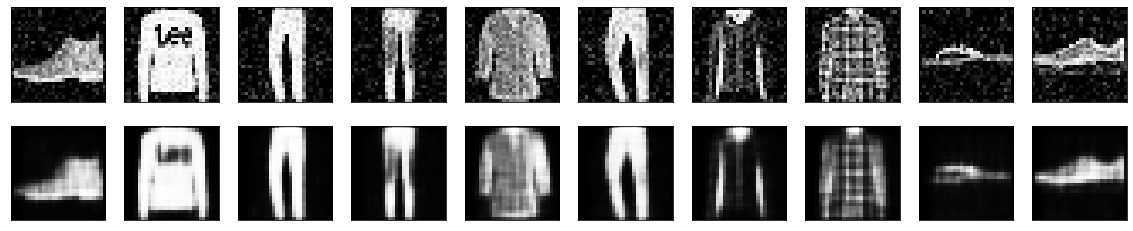

In [49]:
fig,axes = plt.subplots(nrows=2,ncols = 10,sharex=True , sharey = True ,figsize=(20,4))


for images,row in zip([noise_test_dataset[:10],predicted],axes):
    for img,ax in zip(images,row):
        ax.imshow(img.reshape((28,28)), cmap = 'Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)